# Subset forcing data for a single grid point

In this example, we are going to use the `subset_forcing` function to getsubset timeseries data for a single grid point. This point corresponds to the US-Ced: Cedar Bridge, Pine Barrens site. You can search for sites and get the lat-lon values using the [Ameriflux mapping tool](https://ameriflux.lbl.gov/sites/site-search/?mapping-tool).

First, we are going to make the necessary imports:

In [1]:
from subsettools.subsettools import subset_forcing, latlon_to_ij
from hf_hydrodata import gridded
from parflow.tools.io import read_pfb
import matplotlib.pyplot as plt
import numpy as np

We will need to create an account on the [Hydrogen website](https://hydrogen.princeton.edu/pin) before we can use the hydrodata utilities. The pin is valid for 2 days. Use your email and the created pin in the `register_api_pin` function as follows:

In [4]:
gridded.register_api_pin("your_email", "your_pin")

Using the Ameriflux mapping tool, we get the following lat-lon values:

In [2]:
lat = 39.8379
lon = -74.3791
# Since we want to subset only this site, both lat-lon bounds are defined by this point:
latlon_bounds = ([lat, lon],[lat, lon])

Next, we are going to translate the lat-lon bounds to indices in the CONUS2 grid using the `latlon_to_ij` function. The subsettools `latlon_to_ij` function returns a tuple `(imin, jmin, imax, jmax)` of grid indices that define a bounding box containing our region of interest.

In [4]:
ij_bounds = latlon_to_ij(latlon_bounds=latlon_bounds, grid="conus2")
print(f"bounding box: {ij_bounds}")

bounding box: (4057, 1915, 4057, 1915)


We can now subset the forcing files. We need to specify the bounds (we already calculated those), the grid (conus1 or conus2), start and end dates (note that the end date is exclusive) and a forcing dataset to get the files from. You can find more information on our forcing datasets in the [hydrodata documentation](https://maurice.princeton.edu/hydroframe/docs/gridded_data.html#dataset-type-forcing). We also need to set up a directory where the resulting subset data is going to be written as ParFlow Binary (pfb) files. You can replace the `write_dir` argument with a path to your chosen directory. By default, `subset_forcing` will get the data for all 8 forcing variables (API reference [here](https://hydroframesubsettools.readthedocs.io/en/edit-docs/autoapi/subsettools/subsettools/index.html#subsettools.subsettools.subset_forcing)). In this example, we only want to get precipitation and temperature data, and we can specify this in the `forcing_vars` argument.

`subset_forcing` returns a dictionary where the keys are forcing variable names (e.g. 'precipitation', 'air_temp', ...) and the values are list of filepaths where the subset data for that variable were written. We are going to use these paths later to load the data into an array and plot them.

In [11]:
filepaths = subset_forcing(
    ij_bounds,
    grid="conus2",
    start="2012-10-01",
    end="2013-10-01",
    dataset="CW3E",
    write_dir="/home/ga6/subsettools_example", #"/path/to/your/chosen/directory",
    forcing_vars=('precipitation', 'air_temp',)
)

Reading precipitation pfb sequence
Reading air_temp pfb sequence
Finished writing air_temp to folder
Finished writing precipitation to folder


We can now load our data from the temperature forcing files into a numpy array and plot it:

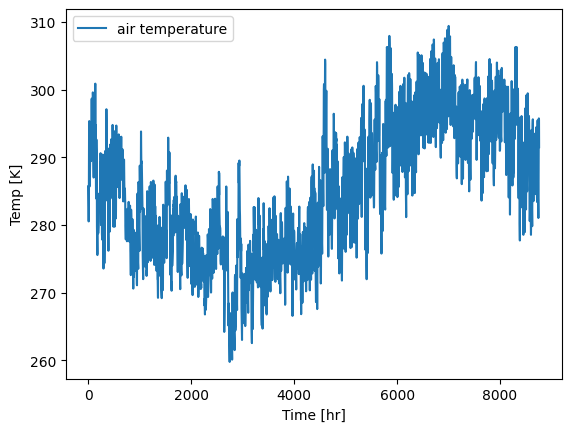

In [10]:
# concatenate all data into a single array:
temp_data = np.array([])
for filepath in filepaths['air_temp']:
    data = read_pfb(filepath).squeeze()
    temp_data = np.concatenate((temp_data, data))

plt.plot(temp_data, label='air temperature')
plt.xlabel('Time [hr]')  
plt.ylabel('Temp [K]')  
plt.legend()
plt.show()

### Alternative version

We can now subset the forcing variables. We need to specify the bounds (we already calculated those), the grid (conus1 or conus2), start and end dates (note that the end date is exclusive) and a forcing dataset to get the files from. You can find more information on our forcing datasets in the [hydrodata documentation](https://maurice.princeton.edu/hydroframe/docs/gridded_data.html#dataset-type-forcing).

In [52]:
forcing_vars = ('precipitation', 
                'downward_shortwave', 
                'downward_longwave', 
                'specific_humidity', 
                'air_temp', 
                'atmospheric_pressure', 
                'east_windspeed', 
                'north_windspeed'
               )

forcing_data = {}
for var in forcing_vars:
    options = {"dataset": "CW3E", 
               "grid": "conus2",
               "period": "hourly", 
               "variable": var, 
               "start_time": "2012-10-01", 
               "end_time": "2013-10-01", 
               "grid_bounds": ij_bounds
              }
    forcing_data[var] = gridded.get_numpy(options)
    print(f"{var} loaded:", forcing_data[var].shape)

precipitation loaded: (8760, 1, 1)
downward_shortwave loaded: (8760, 1, 1)
downward_longwave loaded: (8760, 1, 1)
specific_humidity loaded: (8760, 1, 1)
air_temp loaded: (8760, 1, 1)
atmospheric_pressure loaded: (8760, 1, 1)
east_windspeed loaded: (8760, 1, 1)
north_windspeed loaded: (8760, 1, 1)


We can now plot the forcing variables for the Pine Barrens site for the water year 2012:

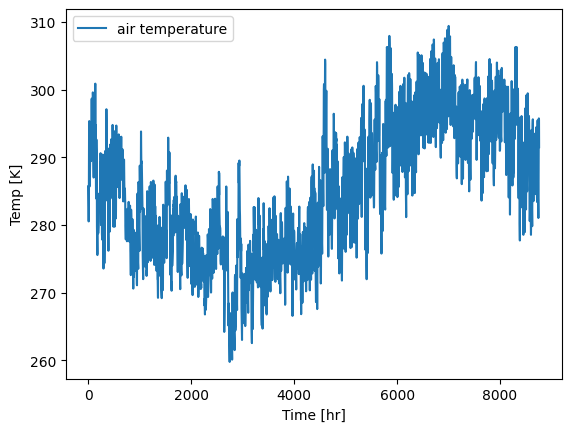

In [43]:
plt.plot(forcing_data['air_temp'].squeeze(), label='air temperature')
plt.xlabel('Time [hr]')  
plt.ylabel('Temp [K]')  
plt.legend()
plt.show()